# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama: Indira Aline
- Email: indiradira63@gmail.com
- Id Dicoding: indira-kbs

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Untuk tampilan grafik yang bagus di notebook
%matplotlib inline
sns.set(style="whitegrid")

# Mengatur ukuran default grafik
plt.rcParams['figure.figsize'] = (10, 6)


### Menyiapkan data yang akan digunakan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Laskar AI/Belajar Penerapan Data Science/Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan/data.csv', delimiter=';')

## **Data Understanding**

In [4]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Jumlah baris dan kolom


In [6]:
print(f"Jumlah baris: {data.shape[0]}, kolom: {data.shape[1]}")

Jumlah baris: 4424, kolom: 37


In [7]:
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
print(data['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


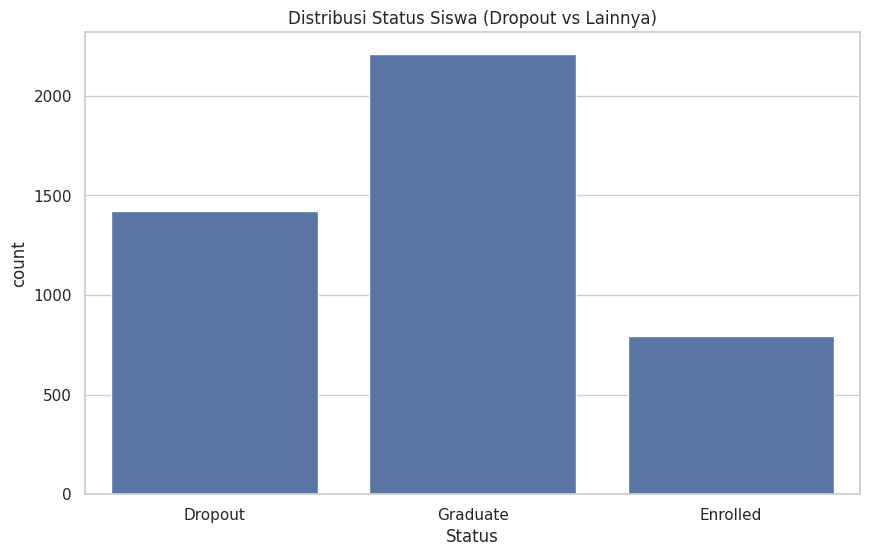

In [9]:
sns.countplot(data=data, x='Status')
plt.title("Distribusi Status Siswa (Dropout vs Lainnya)")
plt.show()

Distribusi Status:

1. Siswa yang Masih Terdaftar (_Enrolled_) memiliki jumlah terbanyak, menunjukkan bahwa sebagian besar siswa masih dalam proses pendidikan.

2. Siswa yang Lulus (_Graduate_) berada di posisi kedua, dengan jumlah yang cukup signifikan meskipun lebih rendah dari siswa yang masih terdaftar.

3. Siswa _Dropout_ memiliki jumlah paling sedikit dibandingkan dua status lainnya, yang merupakan indikator positif dalam retensi siswa.

Persentase missing per kolom

In [10]:
missing = data.isnull().mean().sort_values(ascending=False) * 100
print(missing[missing > 0])

Series([], dtype: float64)


Korelasi antar fitur numerik


In [11]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation = data[num_cols].corr()

Visualisasi heatmap

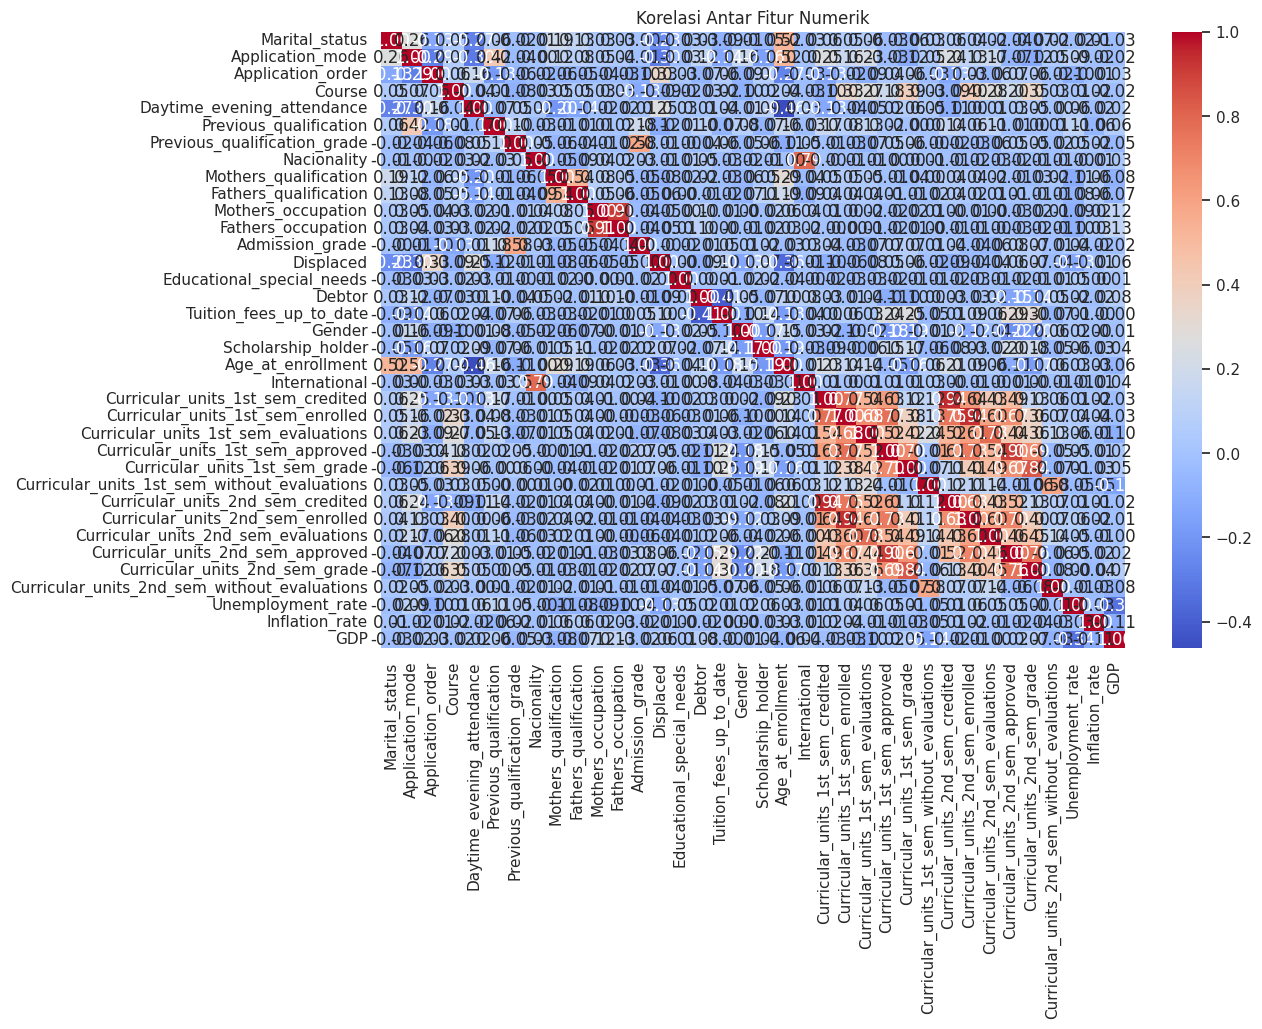

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

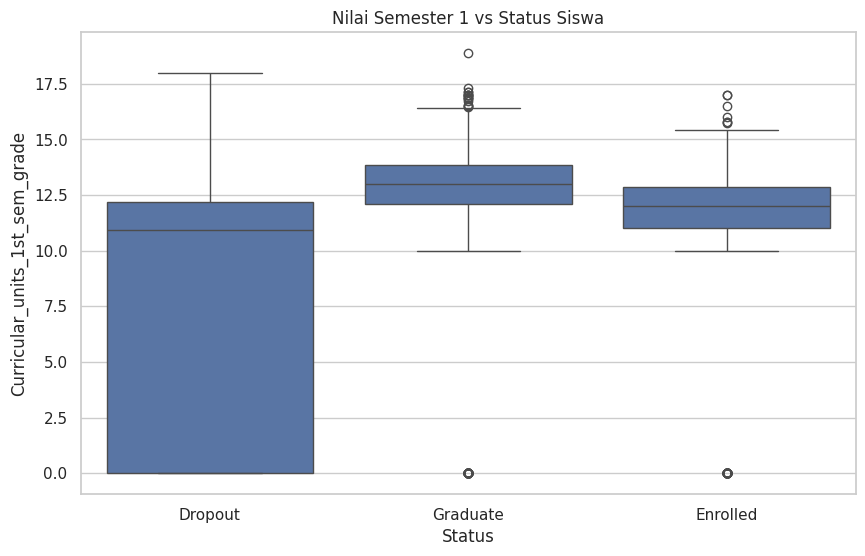

In [13]:
sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_grade')
plt.title("Nilai Semester 1 vs Status Siswa")
plt.show()

Insight:

1. Siswa yang Lulus (_Graduate_) cenderung memiliki nilai Semester 1 yang lebih tinggi dibandingkan dengan kelompok _Dropout_. Hal ini mengindikasikan bahwa performa akademik di awal perkuliahan dapat menjadi prediktor keberhasilan kelulusan.

2. Siswa _Dropout_ umumnya berada di kisaran nilai yang lebih rendah pada Semester 1. Ini menunjukkan bahwa kesulitan akademik sejak awal berpotensi meningkatkan risiko putus studi.

3. Siswa yang Masih Terdaftar (_Enrolled_) memiliki sebaran nilai yang bervariasi, dengan sebagian berada di rentang menengah hingga tinggi. Status ini mungkin mencerminkan siswa yang masih dalam proses menyelesaikan studi atau yang membutuhkan waktu lebih lama untuk lulus.

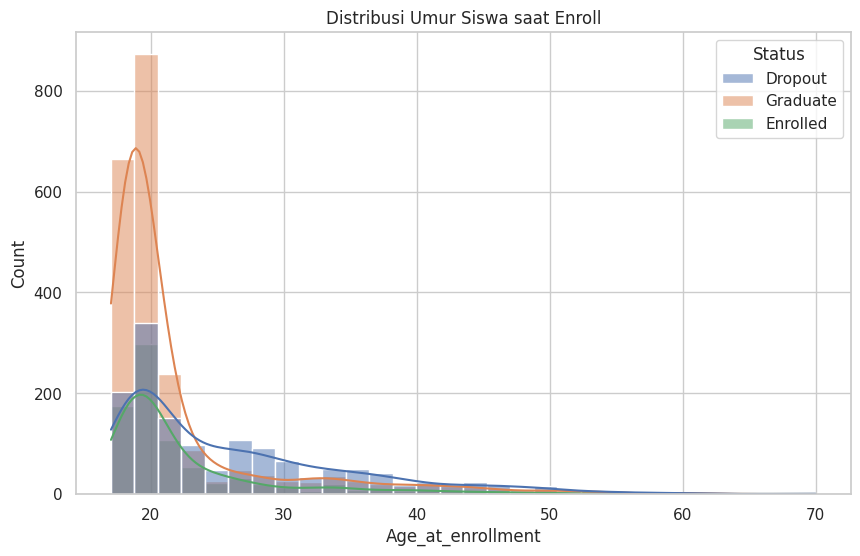

In [14]:
sns.histplot(data=data, x='Age_at_enrollment', hue='Status', kde=True, bins=30)
plt.title("Distribusi Umur Siswa saat Enroll")
plt.show()

1. Kelompok Usia Dominan (20–30 Tahun)
  *   Mayoritas siswa terdaftar pada rentang usia 20–30 tahun, dengan jumlah tertinggi pada status _Enrolled_ dan _Graduate_.
  *   _Dropout_ juga paling banyak terjadi di rentang ini, tetapi proporsinya lebih rendah dibandingkan status lainnya. Hal ini wajar mengingat ini adalah kelompok usia paling aktif dalam pendidikan tinggi.

2. Siswa dengan Usia Lebih Tua (30+ Tahun)
  *   _Dropout_: Cenderung lebih tinggi di atas usia 30 tahun, terutama pada kisaran 40–50 tahun.
  *   _Graduate_: Masih ada lulusan dari kelompok usia ini, tetapi jumlahnya lebih sedikit.
  *   _Enrolled_: Beberapa siswa berusia 30+ tahun masih terdaftar.

3. Anomali Usia Ekstrem (Diatas 50 Tahun)
  *   Jumlah siswa sangat sedikit, tetapi beberapa masih bertahan (_Enrolled_) atau bahkan lulus (_Graduate_), menunjukkan motivasi tinggi meski usia tidak lagi muda.
  *   _Dropout_ di usia 50+ mungkin terjadi.










## **Data Preparation / Preprocessing**

In [15]:
# Drop kolom yang terlalu banyak missing value jika ada
data = data.dropna(thresh=len(data)*0.9, axis=1)

# Label Encoding kolom kategorikal
cat_cols = data.select_dtypes(include='object').columns.drop('Status')
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Label encode target
data['Status'] = le.fit_transform(data['Status'])

# Pisahkan fitur dan target
X = data.drop('Status', axis=1)
y = data['Status']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

[[244  21  51]
 [ 36  44  71]
 [  9  25 384]]


Model cukup baik untuk Kelas 0 dan 2 tetapi membutuhkan optimasi signifikan untuk Kelas 1.

In [18]:
# Bersihkan data untuk dashboard
data_dash = data.copy()

# Decode kolom target ke bentuk aslinya (jika sudah encoded)
data_dash['Status'] = data_dash['Status'].map({
    0: 'Enrolled',
    1: 'Internally Transferred',
    2: 'Dropout'
})

# Simpan sebagai CSV
data_dash.to_csv('dashboard_data.csv', index=False)

In [19]:
# Simpan model dan scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)